# Image Handling
The introduction of cell phones has made digital images a ubiqioutous object in everyone's life. Though some may long for the days of developed film, there are many benefits to switching to digital image processing. The goal of this notebook is to familiarize you with a hallmark of digital images: separating image color into separate digital channels.

Reliance on different colors to convey information is a standard practice in science. By understanding how colors are stored in an image and how we can manipulate the visualization of those colors, we will be able to simulate different spectroscopic practices and eventually combine these with a home-built Raspberry Pi instrument.

In [1]:
# Imports and settings to make the rest of the notebook work. Don't worry about changing these.
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage.color import rgb2gray
from imageProc import *

Let's consider a familiar photo: the Astro's Logo!

![Go 'stros!](astros_logo.png)

The Astro's logo is built on the colors orange, blue, and white. However, that is not how our computers store that information. 

Two different color mapping strategies exist for rendering colors: RGB (red, green, blue) and CMYK (Cyan, Magenta, Yellow, and Black). 

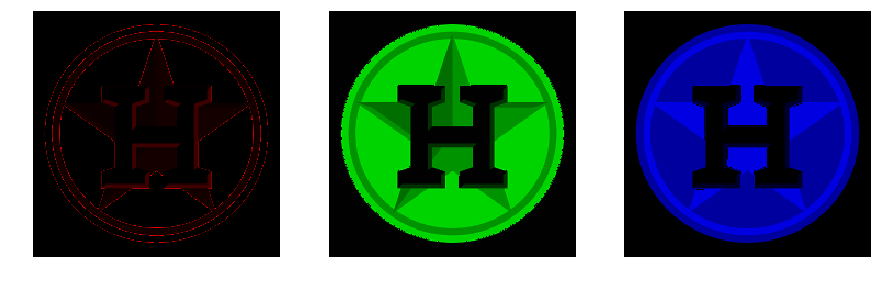

In [2]:
# Feel free to substitute any image you are interesed in using. I offere the astros logo below simply as an example
image_url = "astros_logo.png"
my_im_proc = ImageProcessor(image_url)

# Generate a figure and axes to graph the different versions of the Astro's Logo
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
# Iterate through all three color channels: Red, Green, and Blue
channels = my_im_proc.splitColors(style = 'RGB')
for c, ax in zip(range(3), axs):
    ax.imshow(channels[c])
    ax.set_axis_off()

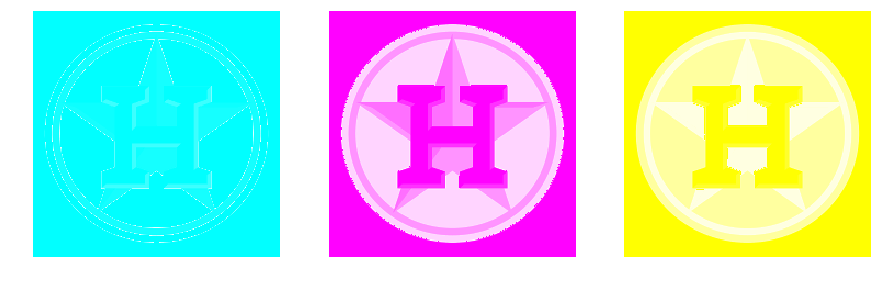

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
channels = my_im_proc.splitColors(style = 'CMYK')
for c, ax in zip(range(3), axs):
    ax.imshow(channels[c])
    ax.set_axis_off()

Manipulation of color channels is the primary pathway to building the image filters that have made services like instagram so popular. For a quick tutorial on how to make your own color [filter](https://www.practicepython.org/blog/2016/12/20/instagram-filters-python.html)!

Breaking pictures down into their subsequent color levels can help highlight details that are otherwise lost in the agglomeration of all colors. Our goal in science is often to isolate that desired bit of information (the "signal") from the rest of the photo (the "noise").

# Image Analyses made possible via Color Channel assessment.
Digital images are simply matrices of numbers that are translated into colored pixel maps. Because of this simplicity, there are many types of programmatic alterations that we can make to an image. These types of image manipulations are commonplace in both science and other professions. Using computers, we can:
- denoise (clear-up) a messy image ![Messy Image](noise_denoise.png)
- detection of edges in images ![Edge Detection](houston_edges.jpg)
- hide one image inside of another ![Merged Images](merging_images.png)

# Cleaning up a Messy Image
Messy images are a common problem in both scientific and consumer communities. Many different denoising algorithms exist, each with a variation on how lost information is interpolated and recovered. Here, we are going to offer up a brief description of the process and offer an opportunity to denoise an image of your own.

In [4]:
# If you want to use your own image, feel free to substitute your own file path below
img_file_path = './houston_skyline_2.jpg'

# Image processor will be our primary way of handling images.
my_img_proc = ImageProcessor(img_file_path)

(-0.5, 1279.5, 719.5, -0.5)

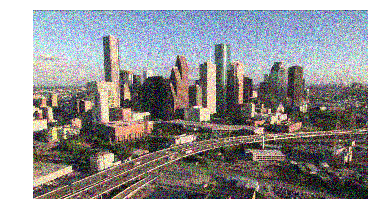

In [5]:
# We are going to add some "noise" to our image first.
noisy = my_img_proc.makeNoisyImage()
plt.imshow(noisy)
plt.axis('off')

Now that we have introduced some level of noise to the image, let's talk about how we can fill in this missing informaiton and clean up the image.

There are many different denoising protocols that can be used. Today, we are going to talk about using the Total Variation filter. We use this filter as it is excellent at removing overall noise while maintaining the original edges of the image. It does this by reducing the variance between pixel values. You can find out the nitty-gritty details of this method [here](https://en.wikipedia.org/wiki/Total_variation_denoising).

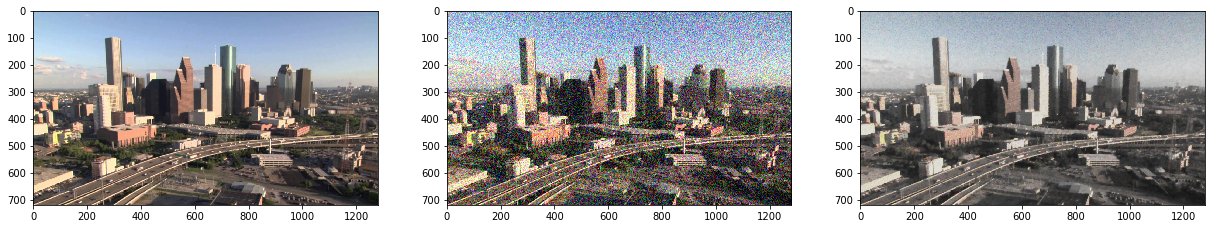

In [9]:
denoised_image = my_img_proc.imageDenoise()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
axs[0].imshow(my_img_proc.returnImage())
axs[1].imshow(noisy)
axs[2].imshow(denoised_image)

In denoising the image, we have succesfully removed much of the random fuzz that we introduced into the image. However, what we have gained in clarity we have lost in vibrance and sharpness. The color depth has disappeared but we now have clean lines for all of the buildings.

# Edge Detection
Sometimes we want to isolate separate continuous regions in an image, like the edges of a lake, the outline of a canyon, or the veins in someone's arms. To do this, we dip again into our color information. Using this digital information, we can isolate the boundaries in the image and highlight where changes are happening most rapidly.

We will look at two different edge detection types: [Canny](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123) and [Sobel](https://en.wikipedia.org/wiki/Sobel_operator)

In [14]:
# Enter you custom image under im_url
im_url = 'houston_skyline_2.jpg'
sobel_im = my_im_proc.edgeDetection(im_url = im_url, e_type = 'Sobel')
canny_im = my_im_proc.edgeDetection(im_url = im_url, e_type = 'Canny')

1280 720


Text(0.5,1,'Sobel')

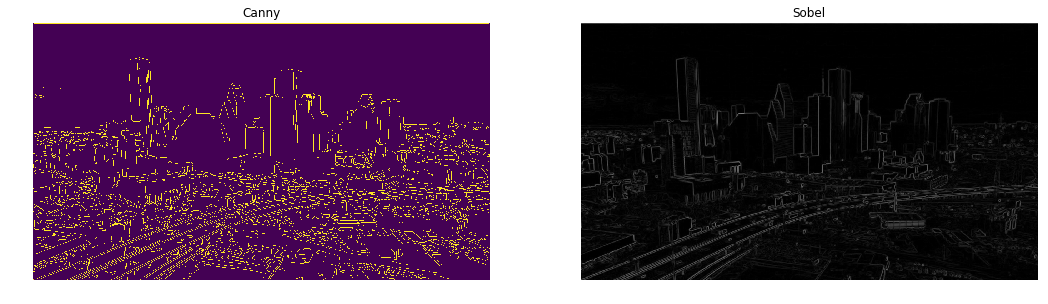

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18,9))
axs[0].imshow(canny_im)
axs[0].axis("off")
axs[0].set_title('Canny')
axs[1].imshow(sobel_im)
axs[1].axis("off")
axs[1].set_title('Sobel')

Different edge measures yield different results. Exploratory data analysis is key to picking out what is the best methodology for isolating the key features desired. 

# Steganography - The art of hiding an image in another image.
One interesting aspect of digital images is to hide one image in the slight color variations of another. The process, well detailed on [towardsDataScience](https://towardsdatascience.com/steganography-hiding-an-image-inside-another-77ca66b2acb1), involves storing the most significant color variations from one image in the least significant information of another.

In [26]:
# First we want to declare our host image. This is the image that will be visible after concealment.
host_image_url = './houston_skyline_2.jpg'
# This is the image that we will hide inside of the host image. Important note: Both images must have the same size.
hidden_image_url = './ny_skyline_2.jpg'


my_im_proc = ImageProcessor(host_image_url)
# This method merges our images
merged_image = my_im_proc.hideMyImage(image_url=hidden_image_url, save = False)
# This method retrieves the hidden image out of the host.
unmerged_image = my_im_proc.revealMyImage(image_url='./merged.png', save = False)

Assigned a merged image


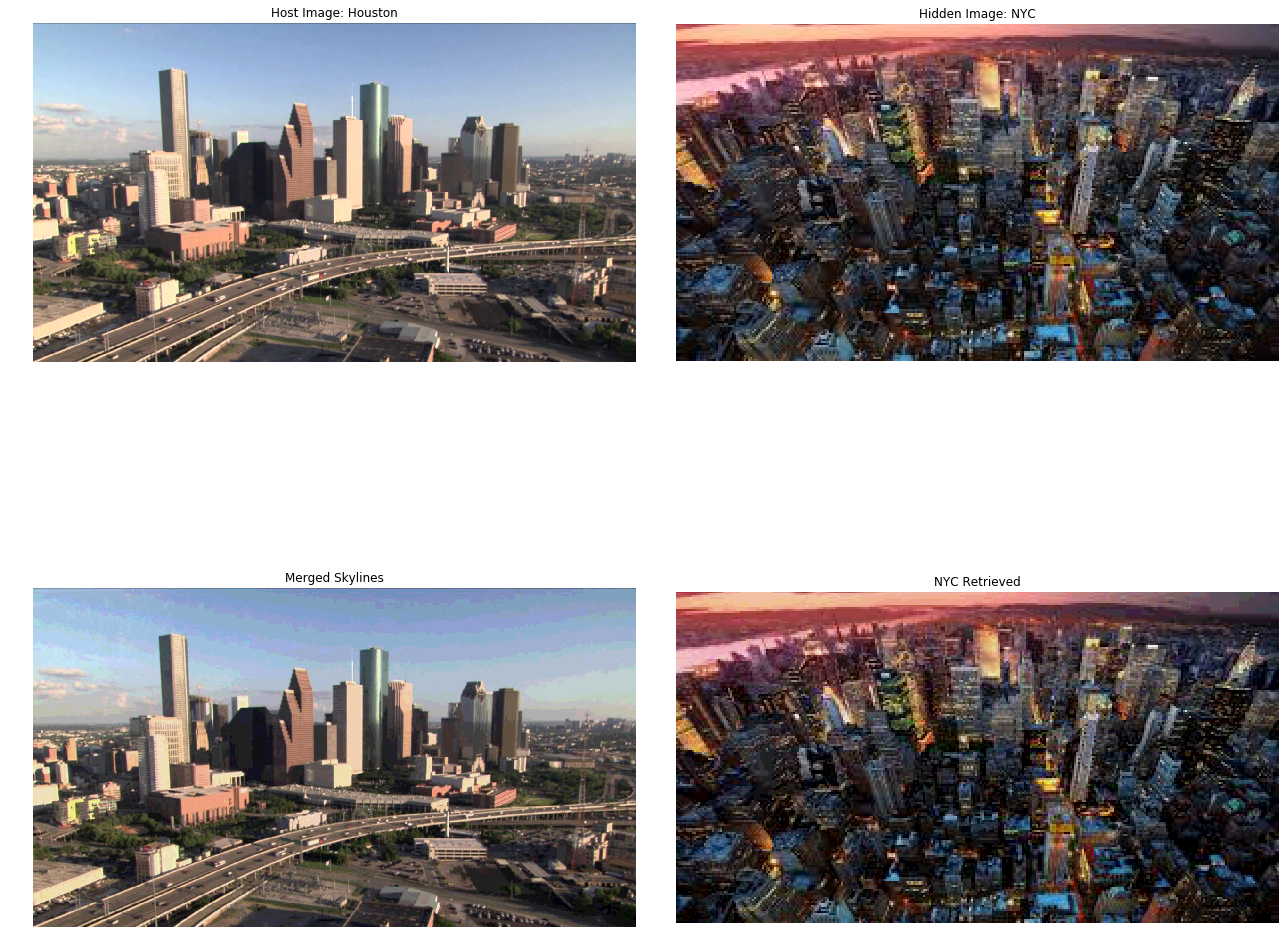

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
axs[0,0].imshow(plt.imread(host_image_url))
axs[0,0].set_title('Host Image: Houston')
axs[0,0].axis('off')
axs[0,1].imshow(plt.imread(hidden_image_url))
axs[0,1].set_title('Hidden Image: NYC')
axs[0,1].axis('off')
axs[1,0].imshow(merged_image)
axs[1,0].set_title('Merged Skylines')
axs[1,0].axis('off')
axs[1,1].imshow(unmerged_image)
axs[1,1].set_title('NYC Retrieved')
axs[1,1].axis('off')
plt.tight_layout()

# Conclusion
